In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/College/Stock_Market_Predictor/GOOG_train.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [3]:
training_set = df.iloc[:, 5:6].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(30, 1258):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [7]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model1 = model.fit(X_train,y_train,epochs=100,batch_size=32, verbose = 2)

Epoch 1/100
39/39 - 19s - loss: 0.0191 - 19s/epoch - 487ms/step
Epoch 2/100
39/39 - 2s - loss: 0.0033 - 2s/epoch - 56ms/step
Epoch 3/100
39/39 - 2s - loss: 0.0025 - 2s/epoch - 54ms/step
Epoch 4/100
39/39 - 2s - loss: 0.0025 - 2s/epoch - 55ms/step
Epoch 5/100
39/39 - 2s - loss: 0.0024 - 2s/epoch - 54ms/step
Epoch 6/100
39/39 - 2s - loss: 0.0023 - 2s/epoch - 54ms/step
Epoch 7/100
39/39 - 2s - loss: 0.0026 - 2s/epoch - 54ms/step
Epoch 8/100
39/39 - 2s - loss: 0.0019 - 2s/epoch - 55ms/step
Epoch 9/100
39/39 - 2s - loss: 0.0020 - 2s/epoch - 54ms/step
Epoch 10/100
39/39 - 2s - loss: 0.0025 - 2s/epoch - 54ms/step
Epoch 11/100
39/39 - 2s - loss: 0.0023 - 2s/epoch - 54ms/step
Epoch 12/100
39/39 - 2s - loss: 0.0022 - 2s/epoch - 54ms/step
Epoch 13/100
39/39 - 2s - loss: 0.0019 - 2s/epoch - 54ms/step
Epoch 14/100
39/39 - 2s - loss: 0.0020 - 2s/epoch - 54ms/step
Epoch 15/100
39/39 - 2s - loss: 0.0018 - 2s/epoch - 54ms/step
Epoch 16/100
39/39 - 2s - loss: 0.0018 - 2s/epoch - 55ms/step
Epoch 17/100
3

<function matplotlib.pyplot.show(*args, **kw)>

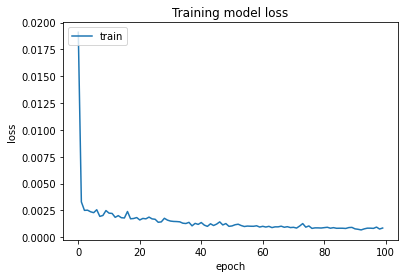

In [8]:
plt.plot(model1.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show  

In [9]:
dataset_test = pd.read_csv("/content/drive/MyDrive/College/Stock_Market_Predictor/GOOG_test.csv")
real_stock_price = dataset_test.iloc[:, 5:6].values

In [10]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 284):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

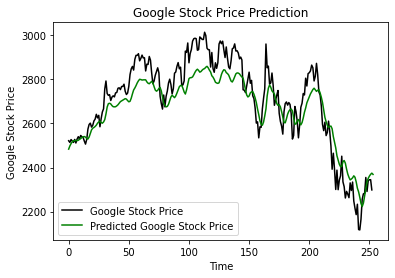

In [11]:
plt.plot(real_stock_price, color = 'black', label = 'Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()